# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import os 
import glob
from skimage import io
from skimage import color, exposure, transform
import pandas as pd
import numpy as np

def Image_transform(img,ROI):
    # Histogram normalization in v channel
    #hsv = color.rgb2hsv(img)
    #hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
    #img = color.hsv2rgb(hsv)

    # Focus on Region of interest 
    img = img[int(ROI[1]): int(ROI[3]), int(ROI[0]): int(ROI[2]), :]
    
    # rescale to standard size
    size = 32
    img = transform.resize(img, (size, size))

    # roll color axis to axis 0
    #img = np.rollaxis(img, -1)
    #(32,32,3) -> (3,32,32)

    return img    

# Load training data

file_dir_name = 'GTSRB_Final_Training_Images/GTSRB/Final_Training/Images'

all_img_paths = glob.glob(os.path.join(file_dir_name, '*/*.ppm'))
np.random.shuffle(all_img_paths)

train_number = int(0.7*len(all_img_paths))
train_img_paths = all_img_paths[:train_number]
validation_img_paths = all_img_paths[train_number + 1 :]

train_imgs = []
train_labels = []
ROI = []

for img_path in train_img_paths:
    ROI = []
    data = pd.read_csv(file_dir_name + '/' + img_path.split('\\')[1] + '/GT-' + img_path.split('\\')[1] + '.csv')
    #print(img_path.split('\\')[1])
    #print(img_path.split('\\')[2])
    for i in range(int(data.shape[0])):
        temp = str(data.at[i,"Filename;Width;Height;Roi.X1;Roi.Y1;Roi.X2;Roi.Y2;ClassId"])
        if img_path.split('\\')[2] == temp.split(";")[0]:
            label = int(temp.split(";")[7])
            ROI.extend((temp.split(";")[3],temp.split(";")[4],temp.split(";")[5],temp.split(";")[6]))
            #print(ROI)
            break;
    img = Image_transform(io.imread(img_path),ROI)
    train_imgs.append(img)
    train_labels.append(label)
    
# Load validation data
    
validation_imgs = []
validation_labels = []
ROI = []

for img_path in validation_img_paths:
    ROI = []
    data = pd.read_csv(file_dir_name + '/' + img_path.split('\\')[1] + '/GT-' + img_path.split('\\')[1] + '.csv')
    #print(img_path.split('\\')[1])
    #print(img_path.split('\\')[2])
    for i in range(int(data.shape[0])):
        temp = str(data.at[i,"Filename;Width;Height;Roi.X1;Roi.Y1;Roi.X2;Roi.Y2;ClassId"])
        if img_path.split('\\')[2] == temp.split(";")[0]:
            label = int(temp.split(";")[7])
            ROI.extend((temp.split(";")[3],temp.split(";")[4],temp.split(";")[5],temp.split(";")[6]))
            #print(ROI)
            break;
    img = Image_transform(io.imread(img_path),ROI)
    validation_imgs.append(img)
    validation_labels.append(label)
    
# Load testing data

test_imgs = []
test_labels = []
ROI = []

test_dir_name = 'GTSRB_Final_Test_Images\GTSRB\Final_Test'
test_img_paths = glob.glob(os.path.join(test_dir_name, '*/*.ppm'))
data = pd.read_csv('GTSRB_Final_Test_GT\GT-final_test.csv')
ppm_count = 0
for img_path in test_img_paths:
    ROI = []
    temp = str(data.at[ppm_count,"Filename;Width;Height;Roi.X1;Roi.Y1;Roi.X2;Roi.Y2;ClassId"])
    ROI.extend((temp.split(";")[3],temp.split(";")[4],temp.split(";")[5],temp.split(";")[6]))
    #print(ROI)
    label = int(temp.split(";")[7])
    img = Image_transform(io.imread(img_path),ROI)
    
    test_imgs.append(img)
    test_labels.append(label)
    
    ppm_count += 1
    
# Load label csv
labelcsv = pd.read_csv('signnames.csv')
label_count = labelcsv.shape[0]
labelname = []
for i in range(labelcsv.shape[0]):
    labelname.append(labelcsv.at[i,"SignName"])
    
"""training_file = ?
validation_file=?
testing_file = ?

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']"""

# This cell takes ten minutes to load the data

D:\ProgramData\Anaconda3\envs\sign\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


"training_file = ?\nvalidation_file=?\ntesting_file = ?\n\nwith open(training_file, mode='rb') as f:\n    train = pickle.load(f)\nwith open(validation_file, mode='rb') as f:\n    valid = pickle.load(f)\nwith open(testing_file, mode='rb') as f:\n    test = pickle.load(f)\n    \nX_train, y_train = train['features'], train['labels']\nX_valid, y_valid = valid['features'], valid['labels']\nX_test, y_test = test['features'], test['labels']"

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'train_imgs,validation_imgs,test_imgs'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'train_labels,validation_labels,test_labels'` is a list containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'labelname'` is a list containing traffic sign name extracted from `signnames.csv` representing the original width and height the image.
- `'ROI'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 



### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(train_imgs)

# TODO: Number of validation examples
n_validation = len(validation_imgs)

# TODO: Number of testing examples.
n_test = len(test_imgs)

# TODO: What's the shape of an traffic sign image?
image_shape = img.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = label_count

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 27446
Number of validation examples = 11762
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

- Visualize both the training dataset and validation dataset with bar chart.
- Showing the input image example after per-processing.

**NOTE:** Using `matplotlib.pyplot` only


[146, 1554, 1535, 982, 1358, 1321, 292, 1011, 1001, 1009, 1424, 941, 1480, 1510, 538, 444, 283, 798, 840, 145, 254, 237, 274, 350, 203, 1064, 402, 163, 386, 182, 328, 531, 175, 474, 293, 846, 271, 148, 1467, 202, 254, 150, 180]


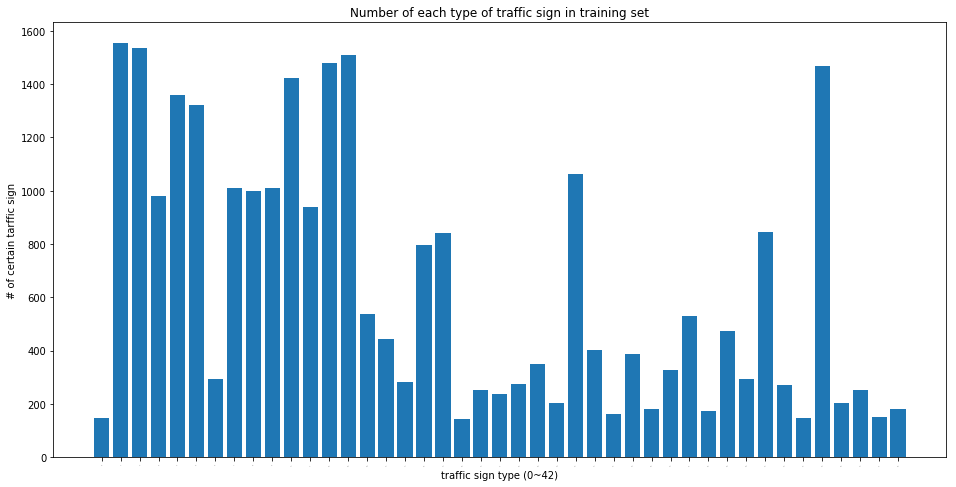

[64, 666, 715, 428, 622, 539, 128, 429, 408, 461, 586, 379, 620, 650, 242, 186, 137, 312, 360, 65, 106, 93, 116, 160, 67, 436, 198, 77, 154, 88, 122, 249, 65, 215, 127, 354, 119, 62, 603, 98, 106, 90, 60]


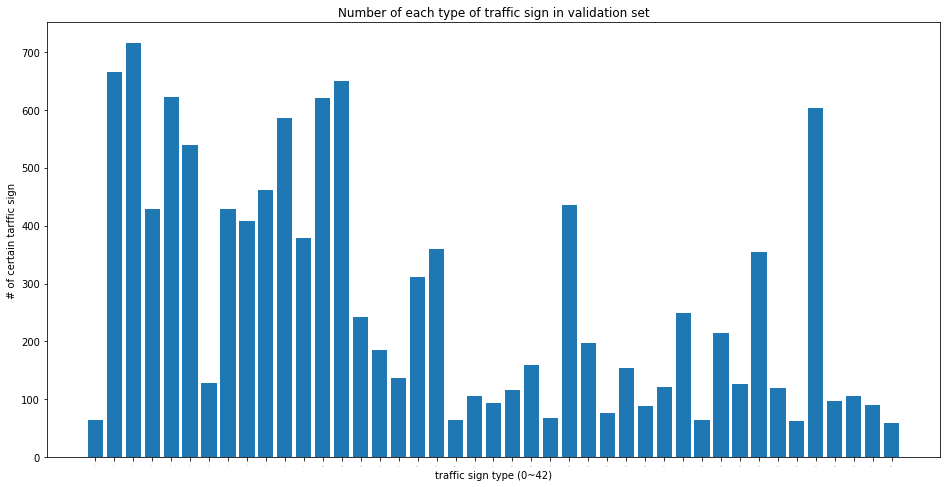

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
# Testing set visualization 43 type of traffic sign numbers using bar 
train_labels_count = []
for i in range(n_classes):
    train_labels_count.append(train_labels.count(i))
print(train_labels_count)

y_pos = np.arange(n_classes)
plt.figure(figsize=(16,8))
plt.bar(y_pos, train_labels_count)
plt.xlabel('traffic sign type (0~42)', fontsize=10)
plt.ylabel('# of certain tarffic sign', fontsize=10)
plt.xticks(y_pos, fontsize=1, rotation=30)
plt.title('Number of each type of traffic sign in training set')
plt.savefig('Train bar.png')
plt.show()


# Validation set visualization 43 type of traffic sign numbers using bar 
validation_labels_count = []
for i in range(n_classes):
    validation_labels_count.append(validation_labels.count(i))
print(validation_labels_count)

y_pos = np.arange(n_classes)
plt.figure(figsize=(16,8))
plt.bar(y_pos, validation_labels_count)
plt.xlabel('traffic sign type (0~42)', fontsize=10)
plt.ylabel('# of certain tarffic sign', fontsize=10)
plt.xticks(y_pos, fontsize=1, rotation=30)
plt.title('Number of each type of traffic sign in validation set')
plt.savefig('validation bar.png')
plt.show()

%matplotlib inline

image label 16


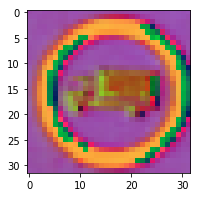

In [5]:
plt.figure(figsize=(3,3))
print("image label",test_labels[0])
hsv = test_imgs[0]
img = color.rgb2hsv(hsv)
plt.imshow(img, cmap="hsv")
plt.savefig('example.png')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

Using LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 


- Neural network architecture (LeNet)
- Play around preprocessing techniques (normalization, rgb to hsv, etc)
- Number of examples per label (some have more than others).

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

- **Using rgb2hsv function as pre-processing pipeline.** 

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to hsv color space, etc.
for i in range(len(train_imgs)):
    train_imgs[i] = color.rgb2hsv(train_imgs[i])

for i in range(len(validation_imgs)):
    validation_imgs[i] = color.rgb2hsv(validation_imgs[i])
    
for i in range(len(test_imgs)):
    test_imgs[i] = color.rgb2hsv(test_imgs[i])
    
# This cell took about two minutes

### Model Architecture

In [9]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def partyNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID', name='conv1') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1, name='conv1_relu')

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1_pool')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name='conv2') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2, name='conv2_relu')

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv2_pool')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W, name='fc1') + fc1_b
    
    # relu Activation.
    fc1    = tf.nn.relu(fc1, name='fc1_relu')
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob, name='fc1_dropout')
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W, name='fc2') + fc2_b
    
    # relu Activation.
    fc2    = tf.nn.relu(fc2, name='fc2_relu')
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob, name='fc2_dropout')
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W, name='logits') + fc3_b
    
    return logits


#### Input and labels

**keep_prob** is a probability to keep units during dropout operation

In [10]:
### Define tensor entity -> 4 dimensional for input  
x = tf.placeholder(tf.float32,[None, 32, 32, 3])
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Probability to keep units
keep_prob = tf.placeholder(tf.float32)

#### Set up the Neural Network to a entity 

In [11]:
### Define the learning rate and other training procedure
rate = 0.005 # if use hsv color space, learnrate should be larger

logits = partyNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Preparation for evaluation 

In [12]:
# determine whether the max output of logits is correct
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# tf.cast : Casts a tensor to a new type.
# tf.reduce_mean : Computes the mean of elements across dimensions of a tensor. (deprecated arguments)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

EPOCHS = 10 # Higher epochs leads to little accuracy improvement
BATCH_SIZE = 256
def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Training the model with Validation set 

In [13]:
### Calculate and report the accuracy on the training and validation set.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train_imgs)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #x_train, y_train = shuffle(train_imgs, train_labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_imgs[offset:end], train_labels[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})
            
        validation_accuracy = evaluate(validation_imgs, validation_labels)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './partyNet')
    print("Model saved")
    
# This cell takes about one minute 

Training...

EPOCH 1 ...
Validation Accuracy = 0.749

EPOCH 2 ...
Validation Accuracy = 0.919

EPOCH 3 ...
Validation Accuracy = 0.941

EPOCH 4 ...
Validation Accuracy = 0.955

EPOCH 5 ...
Validation Accuracy = 0.968

EPOCH 6 ...
Validation Accuracy = 0.968

EPOCH 7 ...
Validation Accuracy = 0.978

EPOCH 8 ...
Validation Accuracy = 0.978

EPOCH 9 ...
Validation Accuracy = 0.977

EPOCH 10 ...
Validation Accuracy = 0.980

Model saved


#### Testing the model after training

In [14]:
### The accuracy on the test set should be calculated and reported as well.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(test_imgs, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\partyNet
Test Accuracy = 0.940


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

- **Download randon image from the Internet.**
- **Using `Microsoft Paint` to spot the region of interest.** 
- **Create a csv file containing each label and region of interest.**

In [15]:
### Load the images and plot them here.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

web_filename = 'Testing_from_Web'

web_img_paths = glob.glob(os.path.join(web_filename, '*/*.jpg'))

test_web_imgs = []
test_web_labels = []
web_imgs_original = []

data = pd.read_csv('Testing_from_Web\Images\labels.csv')
jpg_count = 0

for path in web_img_paths:
    img = Image_transform(io.imread(path), [int(data.at[jpg_count,"x1"]),int(data.at[jpg_count,"y1"]),int(data.at[jpg_count,"x2"]),int(data.at[jpg_count,"y2"]),])
    web_imgs_original.append(img)
    img = color.rgb2hsv(img)
    label = int(data.at[jpg_count,"label"])
    test_web_imgs.append(img)
    test_web_labels.append(label)
    jpg_count += 1

D:\ProgramData\Anaconda3\envs\sign\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


### Predict the Sign Type for Each Image

In [16]:
### Run the predictions here and use the model to output the prediction for each image.
predict = tf.argmax(logits,1)

predict_list = []
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    result = sess.run(predict, feed_dict={x: test_web_imgs, y: test_web_labels, keep_prob:1})
    predict_list = result

INFO:tensorflow:Restoring parameters from .\partyNet


### Show the image,label, predict result

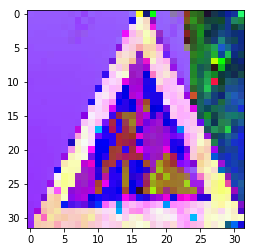

figure 1 label:  25
Model predict result:  25


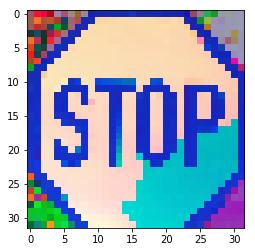

figure 2 label:  14
Model predict result:  14


In [17]:
# First and Second pictures

plt.imshow(test_web_imgs[0])
plt.show()
print("figure 1 label: ", test_web_labels[0])
print("Model predict result: ", predict_list[0])
    
plt.imshow(test_web_imgs[1])
plt.show()
print("figure 2 label: ", test_web_labels[1])
print("Model predict result: ", predict_list[1])

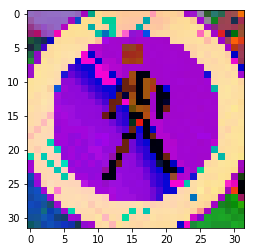

figure 3 label:  27
Model predict result:  0


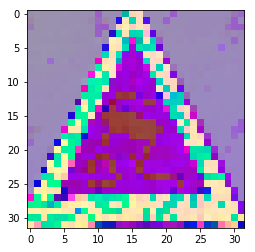

figure 4 label:  23
Model predict result:  23


In [18]:
# Third and fourth pictures

plt.imshow(test_web_imgs[2])
plt.show()
print("figure 3 label: ", test_web_labels[2])
print("Model predict result: ", predict_list[2])

plt.imshow(test_web_imgs[3])
plt.show()
print("figure 4 label: ", test_web_labels[3])
print("Model predict result: ", predict_list[3])

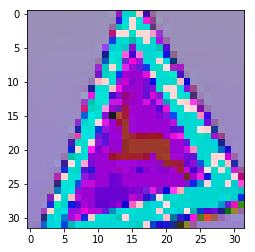

figure 5 label:  31
Model predict result:  31


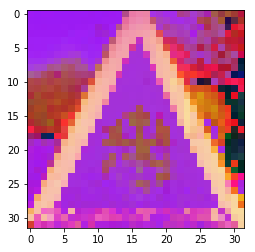

figure 6 label:  30
Model predict result:  30


In [19]:
# Fifth and sixth pictures

plt.imshow(test_web_imgs[4])
plt.show()
print("figure 5 label: ", test_web_labels[4])
print("Model predict result: ", predict_list[4])

plt.imshow(test_web_imgs[5])
plt.show()
print("figure 6 label: ", test_web_labels[5])
print("Model predict result: ", predict_list[5])

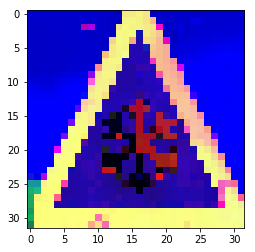

figure 7 label:  30
Model predict result:  30


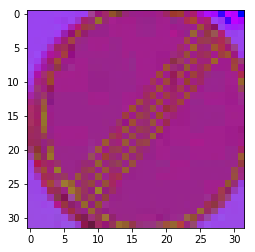

figure 8 label:  32
Model predict result:  32


In [20]:
# 7th and 8th pictures

plt.imshow(test_web_imgs[6])
plt.show()
print("figure 7 label: ", test_web_labels[6])
print("Model predict result: ", predict_list[6])

plt.imshow(test_web_imgs[7])
plt.show()
print("figure 8 label: ", test_web_labels[7])
print("Model predict result: ", predict_list[7])

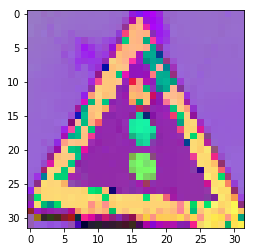

figure 9 label:  26
Model predict result:  26


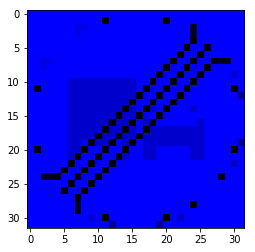

figure 10 label:  42
Model predict result:  42


In [21]:
# 9th and 10th pictures

plt.imshow(test_web_imgs[8])
plt.show()
print("figure 9 label: ", test_web_labels[8])
print("Model predict result: ", predict_list[8])

plt.imshow(test_web_imgs[9])
plt.show()
print("figure 10 label: ", test_web_labels[9])
print("Model predict result: ", predict_list[9])

### Analyze Performance

In [22]:
### Calculate the accuracy for these 10 new images. 

with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(test_web_imgs, test_web_labels)
    print("Web Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\partyNet
Web Test Accuracy = 0.900


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

- **Define the tf.nn.top_k after `logits` output.**
- **Define the following entity after tf.nn.top_k as tf.nn.softmax.**
- **Print out the probabilities of each image using dataframe.**

In [23]:
### Calculate the "top five" labels and probabilities for the predictions on the German traffic sign images found on the web. 
output = tf.nn.top_k(logits, 5)

with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    output_five = sess.run(output, feed_dict={x: test_web_imgs, y: test_web_labels, keep_prob:1})

INFO:tensorflow:Restoring parameters from .\partyNet


In [24]:
### Calculate the "top five" "softmax" probabilities for the predictions on the German traffic sign images found on the web. 

output_label = tf.nn.softmax(output[0])
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    output_softmax = sess.run(output_label, feed_dict={x: test_web_imgs, y: test_web_labels, keep_prob:1})

INFO:tensorflow:Restoring parameters from .\partyNet


### Top five prediction of each image

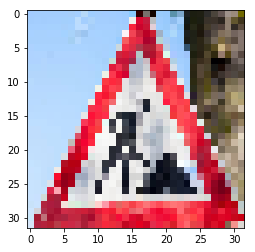

figure 1 label:  25


,label #,labelname,softmax
0,25,Road work,9.998566e-01
1,21,Double curve,1.427793e-04
2,2,Speed limit (50km/h),5.835860e-07
3,5,Speed limit (80km/h),2.551957e-08
4,30,Beware of ice/snow,2.597151e-09


In [25]:
# First image
plt.imshow(web_imgs_original[0])
plt.show()

number = output_five[1][0]

print("figure 1 label: ", test_web_labels[0])
d = {'label #': number, 'labelname': [labelname[number[0]],labelname[number[1]],labelname[number[2]],labelname[number[3]],labelname[number[4]]],'softmax':output_softmax[0]}
df = pd.DataFrame(data=d)
df

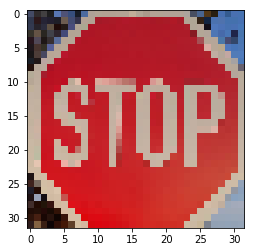

figure 2 label:  14


,label #,labelname,softmax
0,14,Stop,0.981836
1,17,No entry,0.008412
2,3,Speed limit (60km/h),0.004223
3,13,Yield,0.003346
4,8,Speed limit (120km/h),0.002182


In [26]:
# Second image
plt.imshow(web_imgs_original[1])
plt.show()

number = output_five[1][1]

print("figure 2 label: ", test_web_labels[1])
d = {'label #': number, 'labelname': [labelname[number[0]],labelname[number[1]],labelname[number[2]],labelname[number[3]],labelname[number[4]]],'softmax':output_softmax[1]}
df = pd.DataFrame(data=d)
df

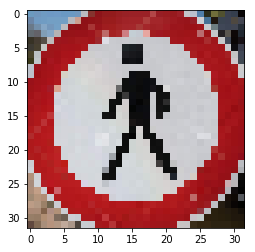

figure 3 label:  27


,label #,labelname,softmax
0,0,Speed limit (20km/h),9.998566e-01
1,4,Speed limit (70km/h),1.427793e-04
2,1,Speed limit (30km/h),5.835860e-07
3,38,Keep right,2.551957e-08
4,39,Keep left,2.597151e-09


In [27]:
# Third image
plt.imshow(web_imgs_original[2])
plt.show()

number = output_five[1][2]

print("figure 3 label: ", test_web_labels[2])
d = {'label #': number, 'labelname': [labelname[number[0]],labelname[number[1]],labelname[number[2]],labelname[number[3]],labelname[number[4]]],'softmax':output_softmax[0]}
df = pd.DataFrame(data=d)
df

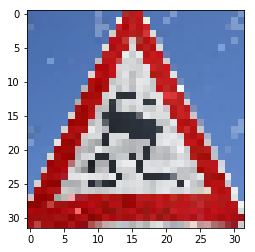

figure 4 label:  23


,label #,labelname,softmax
0,23,Slippery road,9.998566e-01
1,19,Dangerous curve to the left,1.427793e-04
2,30,Beware of ice/snow,5.835860e-07
3,21,Double curve,2.551957e-08
4,11,Right-of-way at the next intersection,2.597151e-09


In [28]:
# Fourth image
plt.imshow(web_imgs_original[3])
plt.show()

number = output_five[1][3]

print("figure 4 label: ", test_web_labels[3])
d = {'label #': number, 'labelname': [labelname[number[0]],labelname[number[1]],labelname[number[2]],labelname[number[3]],labelname[number[4]]],'softmax':output_softmax[0]}
df = pd.DataFrame(data=d)
df

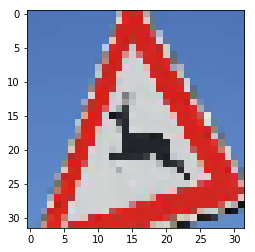

figure 5 label:  31


,label #,labelname,softmax
0,31,Wild animals crossing,9.998566e-01
1,21,Double curve,1.427793e-04
2,25,Road work,5.835860e-07
3,19,Dangerous curve to the left,2.551957e-08
4,23,Slippery road,2.597151e-09


In [29]:
# Fifth image
plt.imshow(web_imgs_original[4])
plt.show()

number = output_five[1][4]

print("figure 5 label: ", test_web_labels[4])
d = {'label #': number, 'labelname': [labelname[number[0]],labelname[number[1]],labelname[number[2]],labelname[number[3]],labelname[number[4]]],'softmax':output_softmax[0]}
df = pd.DataFrame(data=d)
df

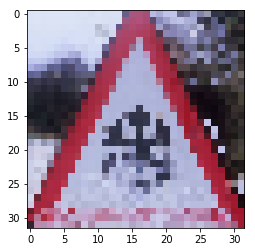

figure 6 label:  30


,label #,labelname,softmax
0,30,Beware of ice/snow,9.998566e-01
1,11,Right-of-way at the next intersection,1.427793e-04
2,23,Slippery road,5.835860e-07
3,28,Children crossing,2.551957e-08
4,20,Dangerous curve to the right,2.597151e-09


In [30]:
# Sixth image
plt.imshow(web_imgs_original[5])
plt.show()

number = output_five[1][5]

print("figure 6 label: ", test_web_labels[5])
d = {'label #': number, 'labelname': [labelname[number[0]],labelname[number[1]],labelname[number[2]],labelname[number[3]],labelname[number[4]]],'softmax':output_softmax[0]}
df = pd.DataFrame(data=d)
df

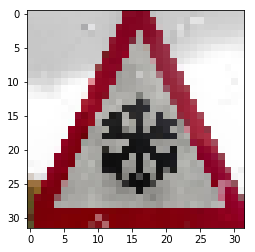

figure 7 label:  30


,label #,labelname,softmax
0,30,Beware of ice/snow,9.998566e-01
1,11,Right-of-way at the next intersection,1.427793e-04
2,28,Children crossing,5.835860e-07
3,21,Double curve,2.551957e-08
4,23,Slippery road,2.597151e-09


In [31]:
# Seventh image
plt.imshow(web_imgs_original[6])
plt.show()

number = output_five[1][6]

print("figure 7 label: ", test_web_labels[6])
d = {'label #': number, 'labelname': [labelname[number[0]],labelname[number[1]],labelname[number[2]],labelname[number[3]],labelname[number[4]]],'softmax':output_softmax[0]}
df = pd.DataFrame(data=d)
df

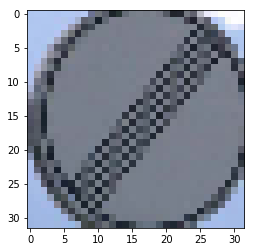

figure 8 label:  32


,label #,labelname,softmax
0,32,End of all speed and passing limits,9.998566e-01
1,41,End of no passing,1.427793e-04
2,13,Yield,5.835860e-07
3,38,Keep right,2.551957e-08
4,1,Speed limit (30km/h),2.597151e-09


In [32]:
# Eighth image
plt.imshow(web_imgs_original[7])
plt.show()

number = output_five[1][7]

print("figure 8 label: ", test_web_labels[7])
d = {'label #': number, 'labelname': [labelname[number[0]],labelname[number[1]],labelname[number[2]],labelname[number[3]],labelname[number[4]]],'softmax':output_softmax[0]}
df = pd.DataFrame(data=d)
df

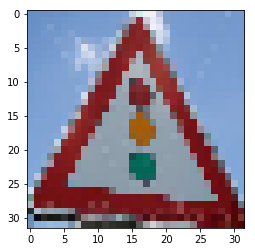

figure 9 label:  26


,label #,labelname,softmax
0,26,Traffic signals,9.998566e-01
1,11,Right-of-way at the next intersection,1.427793e-04
2,18,General caution,5.835860e-07
3,30,Beware of ice/snow,2.551957e-08
4,12,Priority road,2.597151e-09


In [33]:
# Ninth image
plt.imshow(web_imgs_original[8])
plt.show()

number = output_five[1][8]

print("figure 9 label: ", test_web_labels[8])
d = {'label #': number, 'labelname': [labelname[number[0]],labelname[number[1]],labelname[number[2]],labelname[number[3]],labelname[number[4]]],'softmax':output_softmax[0]}
df = pd.DataFrame(data=d)
df

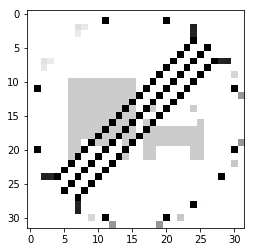

figure 10 label:  42


,label #,labelname,softmax
0,42,End of no passing by vehicles over 3.5 metric ...,9.998566e-01
1,12,Priority road,1.427793e-04
2,6,End of speed limit (80km/h),5.835860e-07
3,41,End of no passing,2.551957e-08
4,10,No passing for vehicles over 3.5 metric tons,2.597151e-09


In [34]:
# Tenth image
plt.imshow(web_imgs_original[9])
plt.show()

number = output_five[1][9]

print("figure 10 label: ", test_web_labels[9])
d = {'label #': number, 'labelname': [labelname[number[0]],labelname[number[1]],labelname[number[2]],labelname[number[3]],labelname[number[4]]],'softmax':output_softmax[0]}
df = pd.DataFrame(data=d)
df

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [35]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a "tf variable name" used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            

INFO:tensorflow:Restoring parameters from .\partyNet


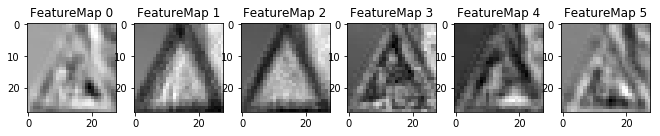

In [37]:
with tf.Session() as sess:
    # Convolution (layer 1 after 'tf.nn.conv2d' operation)
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv1 = sess.graph.get_tensor_by_name('conv1:0')
    outputFeatureMap(test_web_imgs, conv1)
    plt.savefig('05-conv1.png')

INFO:tensorflow:Restoring parameters from .\partyNet


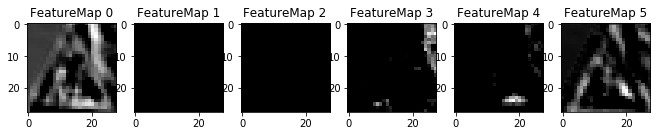

In [38]:
with tf.Session() as sess:
    # ReLU-activation (layer 1 after 'tf.nn.relu' operation)
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv1_relu = sess.graph.get_tensor_by_name('conv1_relu:0')
    outputFeatureMap(test_web_imgs, conv1_relu)
    #plt.savefig('06-conv1_relu.png')

INFO:tensorflow:Restoring parameters from .\partyNet


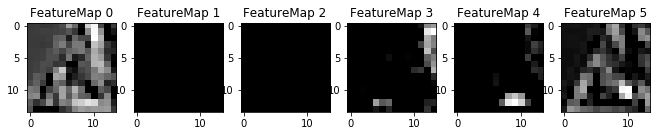

In [39]:
with tf.Session() as sess:
    # Max-pooling (layer 1 after 'tf.nn.max_pool' operation)
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv1_pool = sess.graph.get_tensor_by_name('conv1_pool:0')
    outputFeatureMap(test_web_imgs, conv1_pool)
    #plt.savefig('07-conv1_pool.png')